In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data/Classified_Data.csv',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

,copy,True
,with_mean,True
,with_std,True


In [8]:
scaled_features = scaler.transform(X)

In [9]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]], shape=(1000, 10))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df_feat
y= df['TARGET CLASS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
predictions = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [19]:
print(confusion_matrix(y_test,predictions))

[[152   7]
 [  8 133]]


In [20]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

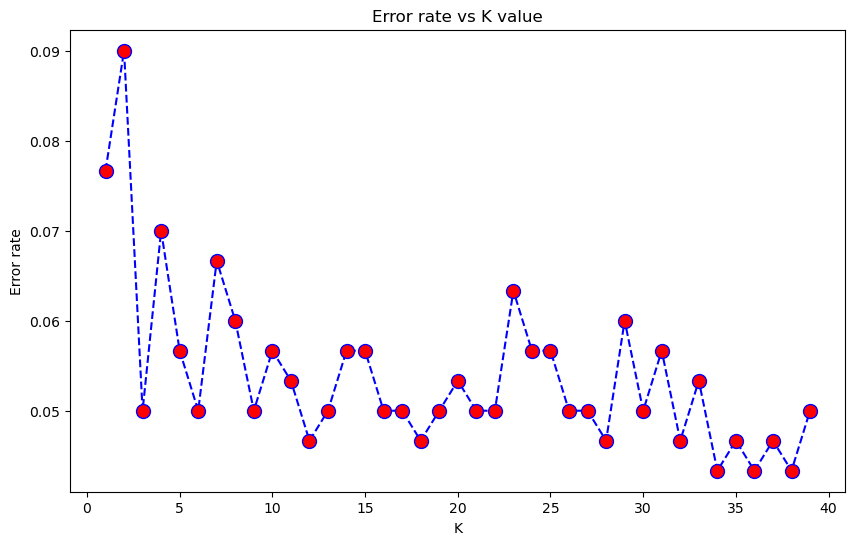

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(
    range(1,40),
    error_rate,
    color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)
ax.plot()
ax.set_title('Error rate vs K value')
ax.set_xlabel('K')
ax.set_ylabel('Error rate')

plt.show()


In [29]:
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[152   7]
 [  8 133]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[152   7]
 [  8 133]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

